In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [4]:
bmp_dir = '../DMD_inputs/tridents'

In [5]:
def draw_vert_strip(img: np.ndarray, x: int, grayscale: float, width = 16):
    img[:, x - width // 2:x + width // 2] = grayscale

In [6]:
def trident_1d(ws: list[int], a1: float = 1, a2: float = 1, shape: tuple[int, int] = (1600, 2716)) -> list[np.ndarray]:
    imgs = []
    h, w = shape
    for u in ws:
        img = np.zeros(shape)
        draw_vert_strip(img, w // 2, a1)
        draw_vert_strip(img, w // 2 - (u + 1) * 16, a2)
        draw_vert_strip(img, w // 2 + (u + 1) * 16, a2)
        imgs.append(img)
    return imgs

In [7]:
def draw_ring(inner: int, outer: int, a2: float = 1, img_shape: tuple = (1600, 2716)) -> np.ndarray:
    ring = np.zeros((img_shape[0], img_shape[1]), dtype=np.uint8)
    # white large circle
    ring = cv.circle(ring, (ring.shape[1]//2, ring.shape[0]//2), outer, a2, -1)
    # black small circle
    ring = cv.circle(ring, (ring.shape[1]//2, ring.shape[0]//2), inner, 0, -1)
    return ring

def trident_2d(ws: list[int], a1: float = 1, a2: float = 1, shape: tuple[int, int] = (1600, 2716)) -> list[np.ndarray]:
    imgs = []
    h, w = shape
    for u in ws:
        img = draw_ring(16 * (u + 1), 16 * (u + 2), a2)
        img = cv.circle(img, (w // 2, h // 2), 16, a1, -1)
        imgs.append(img)
    return imgs

In [8]:
test = trident_1d(range(1,6))

In [9]:
for i in range(1, 6):
    test[i - 1] = cv.normalize(test[i - 1], None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)
    cv.imwrite(f'{bmp_dir}/trident_1d_{i}.bmp', test[i-1])

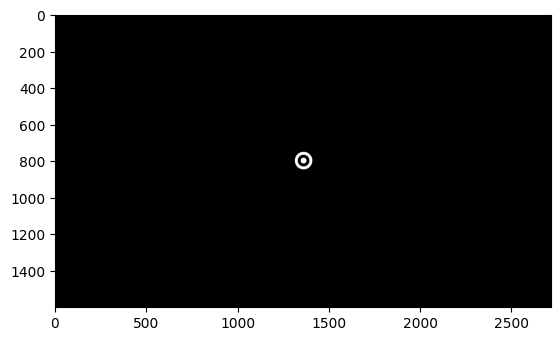

In [10]:
test = trident_2d(range(1,6))
plt.imshow(test[0], cmap='gray')

In [11]:
for i in range(1, 6):
    test[i - 1] = cv.normalize(test[i - 1], None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)
    cv.imwrite(f'{bmp_dir}/trident_2d_{i}.bmp', test[i-1])

In [16]:
def draw_rings(lst: list[int], shape: tuple[int, int] = (1600, 2716)) -> np.ndarray:
    img = np.zeros(shape)
    for i in lst:
        ring = draw_ring(16 * (i + 1), 16 * (i + 2))
        img += ring
    return img

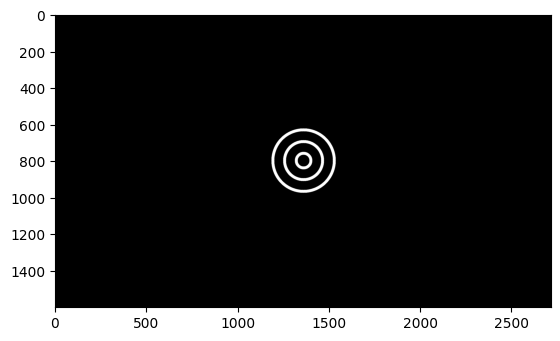

In [20]:
test = draw_rings([1,5,9])
plt.imshow(test, cmap='gray')